<a href="https://colab.research.google.com/github/DButmeh/Chicago-Crime-Data/blob/main/Chicago_Crime_Data%20Part_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chicago Crime Data
###**Dina Al Botmeh**
-------------------------------------------------
---------------------------------------------------


<a name='new0'></a>
# ⭐️ **load data /:crimes in Chicago**
>[Click here](#new1) to jump to assignment's solution.


# ⭐️ **Topic 1) Comparing Police Districts**
>[Click here](#new3) to jump to assignment's solution.

# ⭐️**Topic 2) Crimes Across the Years:**
>[Click here](#new7) to jump to assignment's solution.


# ⭐️**Topic 3) Comparing AM vs. PM Rush Hour:**
>[Click here](#new6) to jump to assignment's solution.

# ⭐️**6) What cycles (seasonality) can you find in this data?**
>[Click here](#new5) to jump to assignment's solution.

# ⭐️ **Supplemental Data: Holiday Data**
>[Click here](#new3) to jump to assignment's solution.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import glob
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)
import pytz

In [ ]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)


In [ ]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.5



In [ ]:
def format_xdates2(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_yearm = mdates.YearLocator()
    fmt_yearm = mdates.DateFormatter("%Y")
    ## for major year ticks
    loc_year = mdates.YearLocator(5)
    fmt_year = mdates.DateFormatter("%Y")

    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(),
                       fontweight=xtick_fontweight)

    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_yearm)
    ax.xaxis.set_minor_formatter(fmt_yearm)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax



In [ ]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major
    ticks every year. Includes different grid options for visibility"""
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")

    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(),
                       fontweight=xtick_fontweight)

    ## customize major ticks xaxis
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')

    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax



<a name='new1'></a>
# ⭐️**Load the data:**
>[Click here](#new0) to jump to up .

In [ ]:
P = "/content/drive/MyDrive/week14 study/newalldata.csv"
df = pd.read_csv(P).drop(columns="Unnamed: 0")
df.head()


ID                    Date     Primary Type          Description  \
0  1326041  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   
1  1319931  01/01/2001 01:00:00 PM          BATTERY               SIMPLE   
2  1324743  01/01/2001 01:00:00 PM         GAMBLING  ILLEGAL ILL LOTTERY   
3  1310717  01/01/2001 01:00:00 AM  CRIMINAL DAMAGE           TO VEHICLE   
4  1318099  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   

      Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0                RESIDENCE   False     False  1624      16.0   NaN  41.957850   
1                RESIDENCE   False      True   825       8.0   NaN  41.783892   
2                   STREET    True     False   313       3.0   NaN  41.780412   
3                   STREET   False     False  2424      24.0   NaN  42.012391   
4  RESIDENCE PORCH/HALLWAY   False      True   214       2.0   NaN  41.819538   

   Longitude  
0 -87.749185  
1 -87.684841  
2 -87.611970  
3 -87.678032  
4 -87.620020

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 603.2+ MB


In [ ]:
df['Primary Type'].value_counts()

Primary Type
THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING                              7185
CRIMINAL SEXUAL ASSAULT                 6353
STALKING                                4664
INTIMIDATION                            4595
CONCEALED CARRY LICENSE VIOLATION       1019
OBSCENITY                                810
PUBLIC INDECENCY                         193
NON-CRIMINAL                             181
OTHER NARCOTIC VIOLATION                 147
HUMAN TRAFFICKING                         96
NON - CRIMINAL                            38
RITUALISM                                 24
NON-CRIMINAL (SUBJECT SPECIFIED)           9
DOMESTIC VIOLENCE                          1
Name: count, dtype: int64

In [ ]:
#Handling Inconsistencies
df['Primary Type'] = df['Primary Type'].replace(['NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)'], 'NON-CRIMINAL')
df['Primary Type'] = df['Primary Type'].replace(['CRIM SEXUAL ASSAULT','SEX OFFENSE','PROSTITUTION','CRIMINAL SEXUAL ASSAULT'],'CRIMINAL SEXUAL ASSAULT')
df['Primary Type'].value_counts()

Primary Type
THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
CRIMINAL SEXUAL ASSAULT               134129
WEAPONS VIOLATION                     103906
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING                              7185
STALKING                                4664
INTIMIDATION                            4595
CONCEALED CARRY LICENSE VIOLATION       1019
OBSCENITY                                810
NON-CRIMINAL                             228
PUBLIC INDECENCY                         193
OTHER NARCOTIC VIOLATION                 147
HUMAN TRAFFICKING                         96
RITUALISM                                 24
DOMESTIC VIOLENCE                          1
Name: count, dtype: int64

In [ ]:
#Change the column name to be a clear indicator
df = df.rename(columns={'Primary Type': 'Crime Type'})

In [ ]:
df.isna().sum()

ID                           0
Date                         0
Crime Type                   0
Description                  0
Location Description     10928
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Latitude                 88685
Longitude                88685
dtype: int64

In [ ]:
#fill nan value with missing so not to lose the crime information
df["District"].fillna("Missing",inplace=True)
#fill Location Description with No Description
df["Location Description"].fillna("No Description",inplace=True)


<ipython-input-13-7bc46e09e055>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["District"].fillna("Missing",inplace=True)


In [ ]:
df.isna().sum()


ID                           0
Date                         0
Crime Type                   0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    614846
Latitude                 88685
Longitude                88685
dtype: int64

In [ ]:
df2=df.copy()

In [ ]:
import holidays
import datetime as dt
from holidays import country_holidays

In [ ]:
## making a date range that covers full dataset
all_days = pd.date_range(df["Date"].min(), df["Date"].max())
all_days



DatetimeIndex(['2001-01-01 01:00:00', '2001-01-02 01:00:00',
               '2001-01-03 01:00:00', '2001-01-04 01:00:00',
               '2001-01-05 01:00:00', '2001-01-06 01:00:00',
               '2001-01-07 01:00:00', '2001-01-08 01:00:00',
               '2001-01-09 01:00:00', '2001-01-10 01:00:00',
               ...
               '2022-12-22 01:00:00', '2022-12-23 01:00:00',
               '2022-12-24 01:00:00', '2022-12-25 01:00:00',
               '2022-12-26 01:00:00', '2022-12-27 01:00:00',
               '2022-12-28 01:00:00', '2022-12-29 01:00:00',
               '2022-12-30 01:00:00', '2022-12-31 01:00:00'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [ ]:
# Convert the 'Date' column to datetime if it's not already
## Converting crimedatetime and coercing errors
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
## setting and sorting the index
df = df.set_index("Date")
df = df.sort_index()
df.head(3)

ID                  Crime Type  \
Date                                              
2001-01-01  3214584                       THEFT   
2001-01-01  1927872                       THEFT   
2001-01-01  4768442  OFFENSE INVOLVING CHILDREN   

                              Description Location Description  Arrest  \
Date                                                                     
2001-01-01  FINANCIAL ID THEFT: OVER $300               STREET   False   
2001-01-01        AGG: FINANCIAL ID THEFT            RESIDENCE   False   
2001-01-01  SEX ASSLT OF CHILD BY FAM MBR            RESIDENCE   False   

            Domestic  Beat District  Ward   Latitude  Longitude  
Date                                                             
2001-01-01     False  2221     22.0  21.0  41.732563 -87.669923  
2001-01-01     False   812      8.0   NaN  41.778094 -87.770137  
2001-01-01     False  2124      2.0   4.0  41.807275 -87.593707

 <a name='new3'></a>
# ⭐️**Topic 1) Comparing Police Districts**
>[Click here](#new0) to jump to up .

#Year: create a column with just the year.

In [ ]:
## Engineering Features using components of the date/time
df['Year']= df.index.year
df.head(3)

ID                  Crime Type  \
Date                                              
2001-01-01  3214584                       THEFT   
2001-01-01  1927872                       THEFT   
2001-01-01  4768442  OFFENSE INVOLVING CHILDREN   

                              Description Location Description  Arrest  \
Date                                                                     
2001-01-01  FINANCIAL ID THEFT: OVER $300               STREET   False   
2001-01-01        AGG: FINANCIAL ID THEFT            RESIDENCE   False   
2001-01-01  SEX ASSLT OF CHILD BY FAM MBR            RESIDENCE   False   

            Domestic  Beat District  Ward   Latitude  Longitude  Year  
Date                                                                   
2001-01-01     False  2221     22.0  21.0  41.732563 -87.669923  2001  
2001-01-01     False   812      8.0   NaN  41.778094 -87.770137  2001  
2001-01-01     False  2124      2.0   4.0  41.807275 -87.593707  2001

--------------------------------------------------------
#**Which district had the most crimes in 2022?**
#**Which had the least?**

In [ ]:
## keeping data from yr 2022 to present
df22 = df.loc[df['Year'] == 2022, ['District']].value_counts()  # Filter the DataFrame based on the year of the index
#Which district had the most crimes in 2022?
max_n_crime=df22.max()
max_District =df22.idxmax()
#Which had the least?
min_n_crime=df22.min()
min_District = df22.idxmin()
print(f' {max_District} District had the most crimes in 2022 with {max_n_crime} crimes')
print(f' {min_District} District had the least crimes in 2022 with {min_n_crime} crimes')

 (8.0,) District had the most crimes in 2022 with 14805 crimes
 (31.0,) District had the least crimes in 2022 with 15 crimes


In [ ]:
order = df22.index.get_level_values('District')


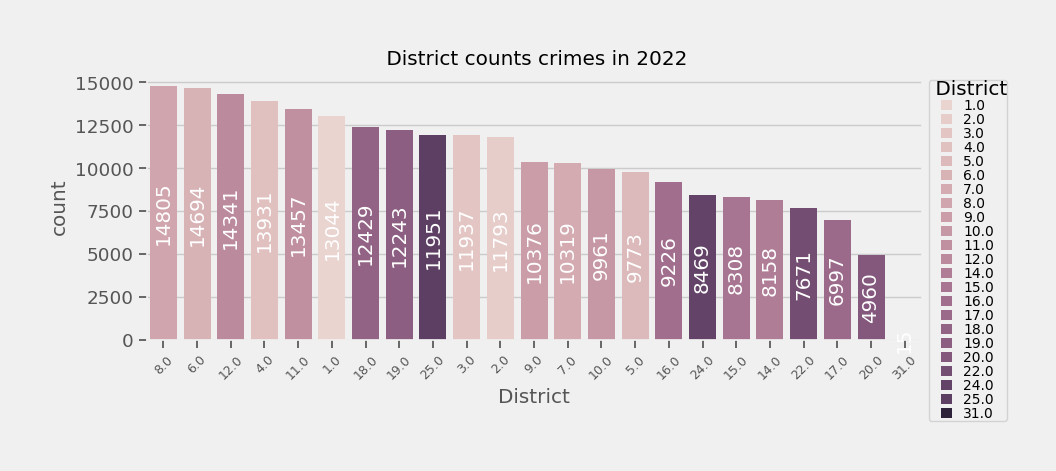

In [ ]:
fig=plt.figure(figsize=(10, 4))
ax=sns.countplot(data=df.loc[df['Year'] == 2022],x="District",hue="District",legend="full",order=order)
ax.set(title=" District counts crimes in 2022");
ax.tick_params("x", labelrotation=45,labelsize= 9)
for container in ax.containers:
    ax.bar_label(container ,label_type='center', rotation=90, color='white')
ax.legend(title=" District", bbox_to_anchor=(1,1),ncol=1,handlelength=0.8, borderpad=0, labelspacing=0,fontsize='x-small');
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

In [ ]:
## Inspect the value_counts for the different types of crimes
crime_counts = df["District"].value_counts(normalize=True).to_frame('%of Crimes');
crime_counts.style.bar('%of Crimes',color='lightblue')



##District (8.0,)  had the most crimes in 2022 with 14805 crimes
##District (31.0,) had the least crimes in 2022 with 15 crimes

 <a name='new7'></a>
# ⭐️**Topic 2) Crimes Across the Years:**
>[Click here](#new0) to jump to up

#Is the total number of crimes increasing or decreasing across the years?

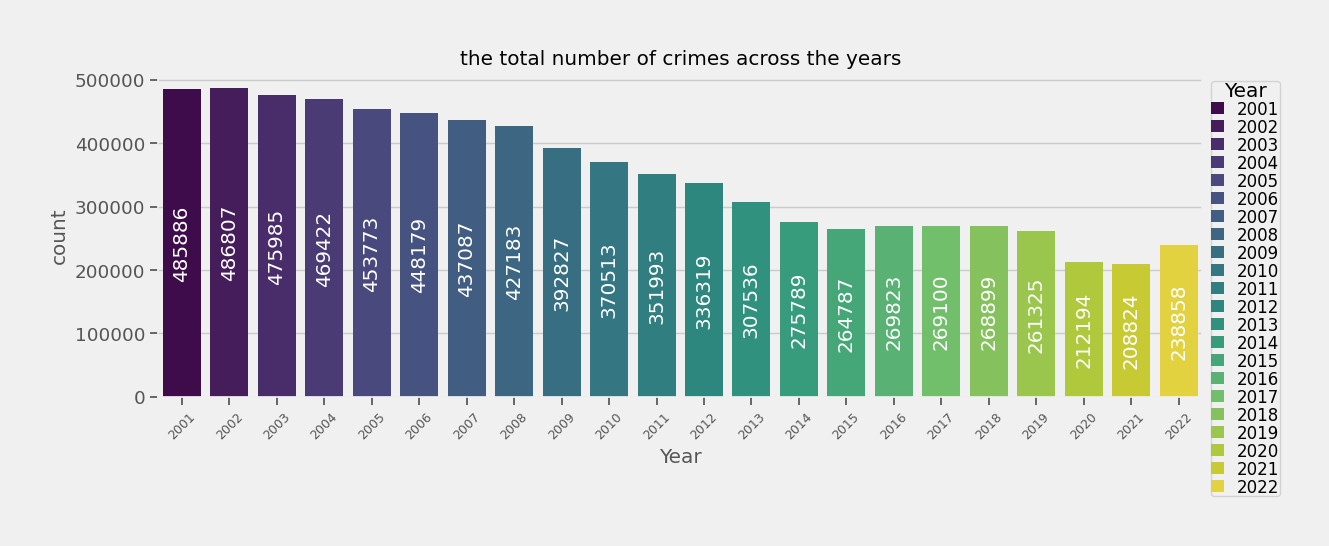

In [ ]:
## visualizing again with years removed
ax=sns.countplot(data=df, x='Year',palette='viridis',hue="Year",legend="full");
ax.set(title="the total number of crimes across the years");
ax.tick_params("x",labelrotation=45,labelsize= 9)
for container in ax.containers:
    ax.bar_label(container ,label_type='center',rotation=90, color='white')
ax.legend(title="Year",bbox_to_anchor=(1,1),ncol=1,handlelength=0.8, borderpad=0, labelspacing=0,fontsize='small');
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

In [ ]:
import matplotlib.ticker as mticks

In [ ]:
str_fmt = mticks.StrMethodFormatter("{x:,.0f}")
str_fmt

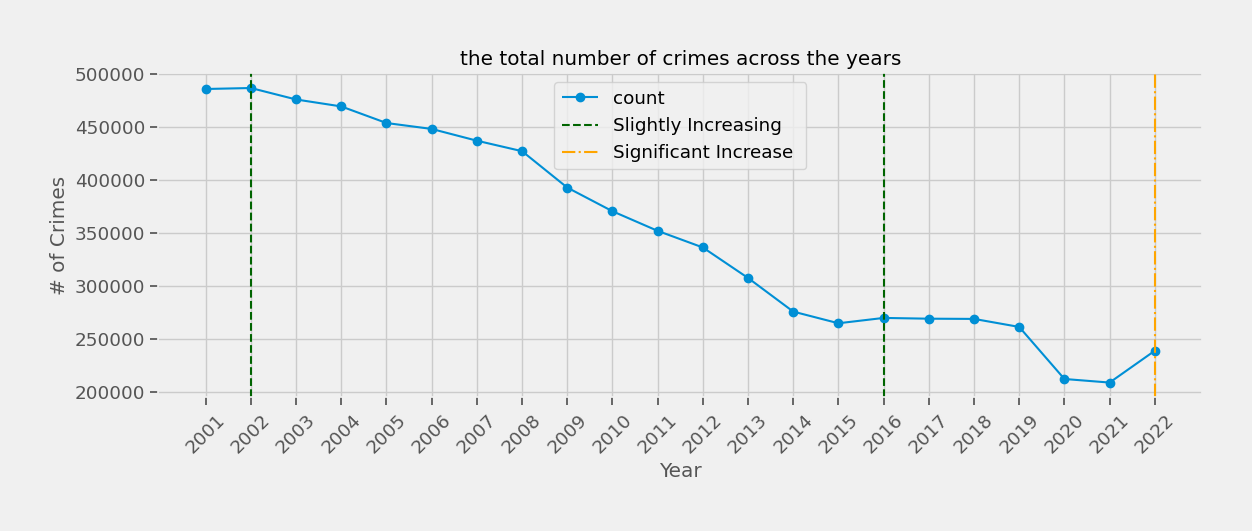

In [ ]:
year_counts = df['Year'].value_counts().sort_index()
ax=year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year',title="the total number of crimes across the years",
                    figsize=(12,4),xticks=year_counts.index);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
ax.axvline(2002, color='darkgreen',ls='--')
ax.axvline(2016, color='darkgreen',ls='--',label='Slightly Increasing')
ax.axvline(2022, color='orange',ls='-.',label='Significant Increase ')
ax.legend()
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)




#**Note:**The total number of crimes has been decreasing over the years, with some exceptions:

- **In 2002 and 2016, there was a slight increase compared to the previous year**.
- **In 2022, there was a significant increase compared to 2021.**

In [ ]:
Type_by_y =df.groupby("Crime Type")["Year"].value_counts().sort_index()
plot_df = Type_by_y.to_frame('Crimes_Pro').reset_index()

In [ ]:
Type_by_Y =df.groupby("Crime Type")["Year"].value_counts(normalize=True).sort_index()
Type_by_Y.head(2)

Crime Type  Year
ARSON       2001    0.077052
            2002    0.078653
Name: proportion, dtype: float64

In [ ]:
## Convert to dataframe and reset index
plot_df_perc = Type_by_Y.to_frame('Crimes_Pro').reset_index()
plot_df_perc

Crime Type  Year  Crimes_Pro
0                ARSON  2001    0.077052
1                ARSON  2002    0.078653
2                ARSON  2003    0.072784
3                ARSON  2004    0.059294
4                ARSON  2005    0.052664
..                 ...   ...         ...
611  WEAPONS VIOLATION  2018    0.052509
612  WEAPONS VIOLATION  2019    0.061007
613  WEAPONS VIOLATION  2020    0.081150
614  WEAPONS VIOLATION  2021    0.086424
615  WEAPONS VIOLATION  2022    0.084365

[616 rows x 3 columns]

In [ ]:
plot_df_perc.duplicated().sum()

0

In [ ]:
#for looping through the value counts series
val_counts_by_year = df.groupby('Crime Type')['Year'].value_counts()
val_counts_by_year.head(2)

Crime Type  Year
ARSON       2002    1032
            2001    1011
Name: count, dtype: int64

In [ ]:
## Getting all of the crimes from the first level of the index
Primary_list = val_counts_by_year.index.levels[0]
Primary_list

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL DAMAGE',
       'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON-CRIMINAL', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'STALKING', 'THEFT',
       'WEAPONS VIOLATION'],
      dtype='object', name='Crime Type')

In [ ]:
g = sns.catplot(data=plot_df_perc, x='Year', y='Crimes_Pro',
                hue='Crime Type', col='Crime Type', col_wrap=2,
                aspect=2, height=5,
                kind='point', sharey=False, sharex=False)

# Loop through the axes dictionary
for col, ax in g.axes_dict.items():
    # Extract the index min and max from the value counts
    min_, max_ = val_counts_by_year.loc[col].agg(['idxmin', 'idxmax'])
    min_, max_ = str(min_), str(max_)

    # Add vertical lines and labels for min and max
    ln1 = ax.axvline(min_, color='darkgreen', linestyle='--')
    lab1 = f'Min (Year={min_})'

    ln2 = ax.axvline(max_, color='darkred', linestyle='--')
    lab2 = f'Max (Year={max_})'

    # Add custom legend
    ax.legend([ln1, ln2], [lab1, lab2])

# Add x grid and adjust tick parameters
for ax in g.axes.flat:
    ax.grid(axis='x')
    ax.tick_params(axis='x', rotation=30)

# Move the legend and adjust layout
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.fig.tight_layout()

# Save the figure
g.fig.savefig('SavedPlot.png', dpi=300)
g.fig

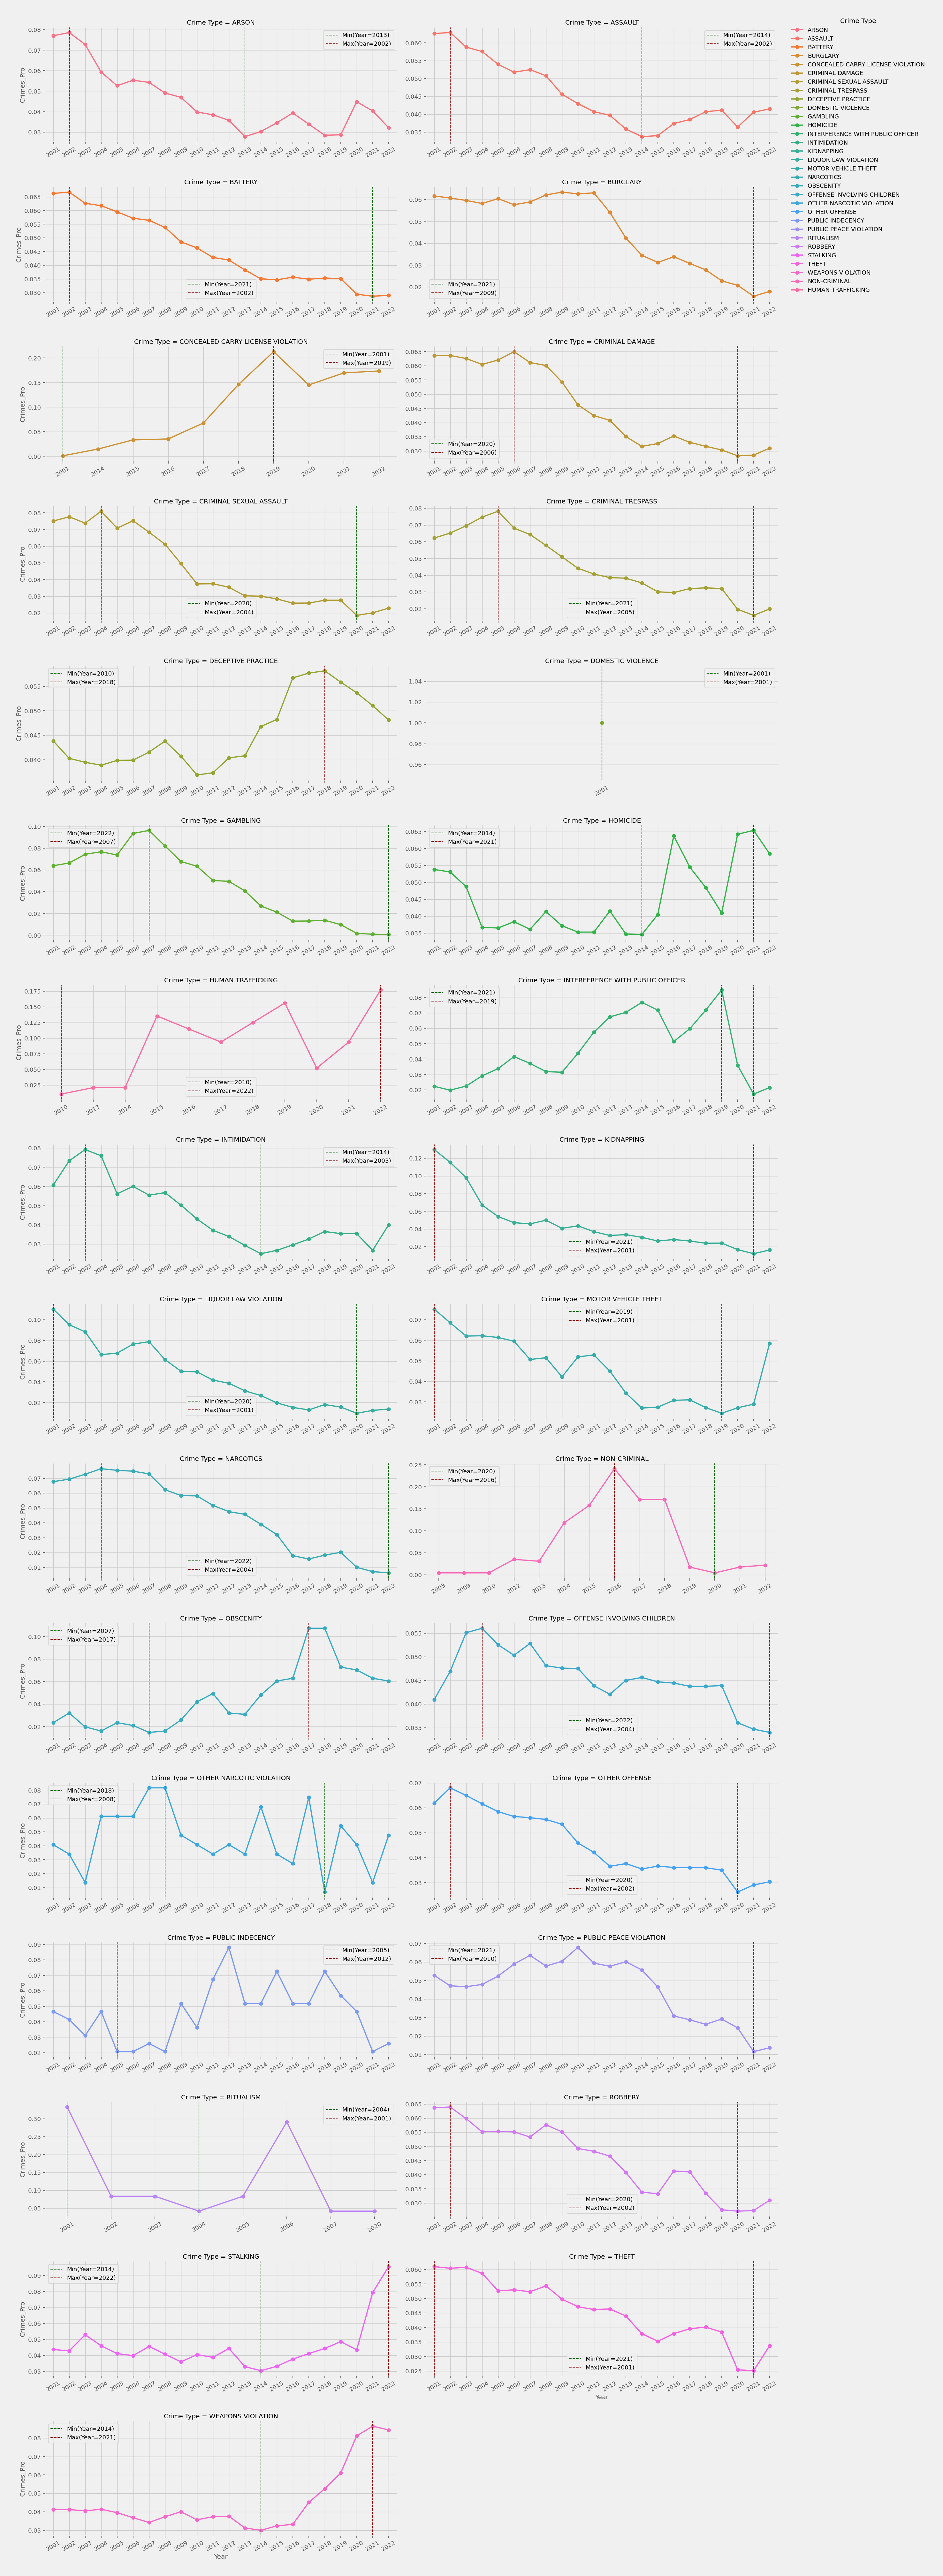

In [ ]:
g = sns.catplot(data=plot_df_perc, x='Year', y='Crimes_Pro',
                hue='Crime Type', col='Crime Type', col_wrap=2,
                aspect=2, height=5,
                kind='point', sharey=False, sharex=False)

## loop throught the axes dict
for col, ax in g.axes_dict.items():
    min_, max_ = val_counts_by_year.loc[col].agg(['idxmin','idxmax'])
    min_, max_ = str(min_), str(max_)
    ln1 = ax.axvline(min_, color='darkgreen',ls='--')
    lab1 = f'Min(Year={min_})'
    ln2 = ax.axvline(max_,color='darkred',ls='--')
    lab2 = f'Max(Year={max_})'
    ax.legend([ln1,ln2], [lab1,lab2])

## add x grid
for ax in g.axes.flat:
    ax.grid(axis='x') # add gridlines
    ax.tick_params(axis='x', rotation=30) # rotate x-axis labels

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.fig.tight_layout()

In [ ]:
df_crimes=plot_df_perc.groupby(["Year","Crime Type"])["Crimes_Pro"].sum().reset_index()
df_crimes=pd.pivot_table(df_crimes,values="Crimes_Pro",index="Year",columns="Crime Type").reset_index()
df_crimes=df_crimes.fillna(0).set_index("Year")
df_crimes.head(2)

Crime Type     ARSON   ASSAULT   BATTERY  BURGLARY  \
Year                                                 
2001        0.077052  0.062630  0.066243  0.061609   
2002        0.078653  0.062907  0.066733  0.060683   

Crime Type  CONCEALED CARRY LICENSE VIOLATION  CRIMINAL DAMAGE  \
Year                                                             
2001                                 0.000981         0.063555   
2002                                 0.000000         0.063648   

Crime Type  CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  DECEPTIVE PRACTICE  \
Year                                                                         
2001                       0.075099           0.062203            0.043844   
2002                       0.077649           0.065204            0.040275   

Crime Type  DOMESTIC VIOLENCE  GAMBLING  HOMICIDE  HUMAN TRAFFICKING  \
Year                                                                   
2001                      1.0  0.063903  0.053816                0.0   
2002                      0.0  0.066434  0.053090                0.0   

Crime Type  INTERFERENCE WITH PUBLIC OFFICER  INTIMIDATION  KIDNAPPING  \
Year                                                                     
2001                                0.022300      0.060718    0.129854   
2002                                0.019829      0.073341    0.115379   

Crime Type  LIQUOR LAW VIOLATION  MOTOR VEHICLE THEFT  NARCOTICS  \
Year                                                               
2001                    0.110265             0.075161   0.067770   
2002                    0.095245             0.068527   0.069408   

Crime Type  NON-CRIMINAL  OBSCENITY  OFFENSE INVOLVING CHILDREN  \
Year                                                              
2001                 0.0   0.023457                    0.040937   
2002                 0.0   0.032099                    0.046925   

Crime Type  OTHER NARCOTIC VIOLATION  OTHER OFFENSE  PUBLIC INDECENCY  \
Year                                                                    
2001                        0.040816       0.061902          0.046632   
2002                        0.034014       0.068034          0.041451   

Crime Type  PUBLIC PEACE VIOLATION  RITUALISM   ROBBERY  STALKING     THEFT  \
Year                                                                          
2001                      0.052797   0.333333  0.063661  0.043739  0.061019   
2002                      0.047172   0.083333  0.063944  0.042882  0.060438   

Crime Type  WEAPONS VIOLATION  
Year                           
2001                 0.041162  
2002                 0.041201

In [ ]:
diff=df_crimes.diff()
diff.head(3)

Crime Type     ARSON   ASSAULT   BATTERY  BURGLARY  \
Year                                                 
2001             NaN       NaN       NaN       NaN   
2002        0.001600  0.000277  0.000490 -0.000926   
2003       -0.005868 -0.004083 -0.004092 -0.001104   

Crime Type  CONCEALED CARRY LICENSE VIOLATION  CRIMINAL DAMAGE  \
Year                                                             
2001                                      NaN              NaN   
2002                                -0.000981         0.000093   
2003                                 0.000000        -0.001058   

Crime Type  CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  DECEPTIVE PRACTICE  \
Year                                                                         
2001                            NaN                NaN                 NaN   
2002                        0.00255           0.003002           -0.003569   
2003                       -0.00381           0.004355           -0.000801   

Crime Type  DOMESTIC VIOLENCE  GAMBLING  HOMICIDE  HUMAN TRAFFICKING  \
Year                                                                   
2001                      NaN       NaN       NaN                NaN   
2002                     -1.0  0.002531 -0.000726                0.0   
2003                      0.0  0.008005 -0.004357                0.0   

Crime Type  INTERFERENCE WITH PUBLIC OFFICER  INTIMIDATION  KIDNAPPING  \
Year                                                                     
2001                                     NaN           NaN         NaN   
2002                               -0.002472      0.012622   -0.014475   
2003                                0.002636      0.005876   -0.017258   

Crime Type  LIQUOR LAW VIOLATION  MOTOR VEHICLE THEFT  NARCOTICS  \
Year                                                               
2001                         NaN                  NaN        NaN   
2002                   -0.015021            -0.006634   0.001638   
2003                   -0.006938            -0.006473   0.003349   

Crime Type  NON-CRIMINAL  OBSCENITY  OFFENSE INVOLVING CHILDREN  \
Year                                                              
2001                 NaN        NaN                         NaN   
2002            0.000000   0.008642                    0.005988   
2003            0.004386  -0.012346                    0.008195   

Crime Type  OTHER NARCOTIC VIOLATION  OTHER OFFENSE  PUBLIC INDECENCY  \
Year                                                                    
2001                             NaN            NaN               NaN   
2002                       -0.006803       0.006131         -0.005181   
2003                       -0.020408      -0.003030         -0.010363   

Crime Type  PUBLIC PEACE VIOLATION  RITUALISM   ROBBERY  STALKING     THEFT  \
Year                                                                          
2001                           NaN        NaN       NaN       NaN       NaN   
2002                     -0.005625      -0.25  0.000283 -0.000858 -0.000581   
2003                     -0.000518       0.00 -0.004111  0.010077  0.000334   

Crime Type  WEAPONS VIOLATION  
Year                           
2001                      NaN  
2002                 0.000038  
2003                -0.000674

In [ ]:
diff.loc["TOTAL"]=diff.sum(axis=0).round(3)
diff.tail(2)

Crime Type     ARSON   ASSAULT   BATTERY  BURGLARY  \
Year                                                 
2022       -0.008231  0.000906  0.000318   0.00221   
TOTAL      -0.045000 -0.021000 -0.037000  -0.04400   

Crime Type  CONCEALED CARRY LICENSE VIOLATION  CRIMINAL DAMAGE  \
Year                                                             
2022                                 0.003925         0.002443   
TOTAL                                0.173000        -0.033000   

Crime Type  CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  DECEPTIVE PRACTICE  \
Year                                                                         
2022                       0.002841           0.003847            -0.00293   
TOTAL                     -0.052000          -0.042000             0.00400   

Crime Type  DOMESTIC VIOLENCE  GAMBLING  HOMICIDE  HUMAN TRAFFICKING  \
Year                                                                   
2022                      0.0 -0.000274 -0.006858           0.083333   
TOTAL                    -1.0 -0.063000  0.005000           0.177000   

Crime Type  INTERFERENCE WITH PUBLIC OFFICER  INTIMIDATION  KIDNAPPING  \
Year                                                                     
2022                                0.004284      0.013275    0.004175   
TOTAL                              -0.001000     -0.021000   -0.114000   

Crime Type  LIQUOR LAW VIOLATION  MOTOR VEHICLE THEFT  NARCOTICS  \
Year                                                               
2022                     0.00128             0.029589  -0.000831   
TOTAL                   -0.09700            -0.017000  -0.061000   

Crime Type  NON-CRIMINAL  OBSCENITY  OFFENSE INVOLVING CHILDREN  \
Year                                                              
2022            0.004386  -0.002469                   -0.000687   
TOTAL           0.022000   0.037000                   -0.007000   

Crime Type  OTHER NARCOTIC VIOLATION  OTHER OFFENSE  PUBLIC INDECENCY  \
Year                                                                    
2022                        0.034014       0.001283          0.005181   
TOTAL                       0.007000      -0.032000         -0.021000   

Crime Type  PUBLIC PEACE VIOLATION  RITUALISM   ROBBERY  STALKING     THEFT  \
Year                                                                          
2022                      0.002054      0.000  0.003614  0.016295  0.008618   
TOTAL                    -0.039000     -0.333 -0.033000  0.052000 -0.027000   

Crime Type  WEAPONS VIOLATION  
Year                           
2022                 -0.00206  
TOTAL                 0.04300

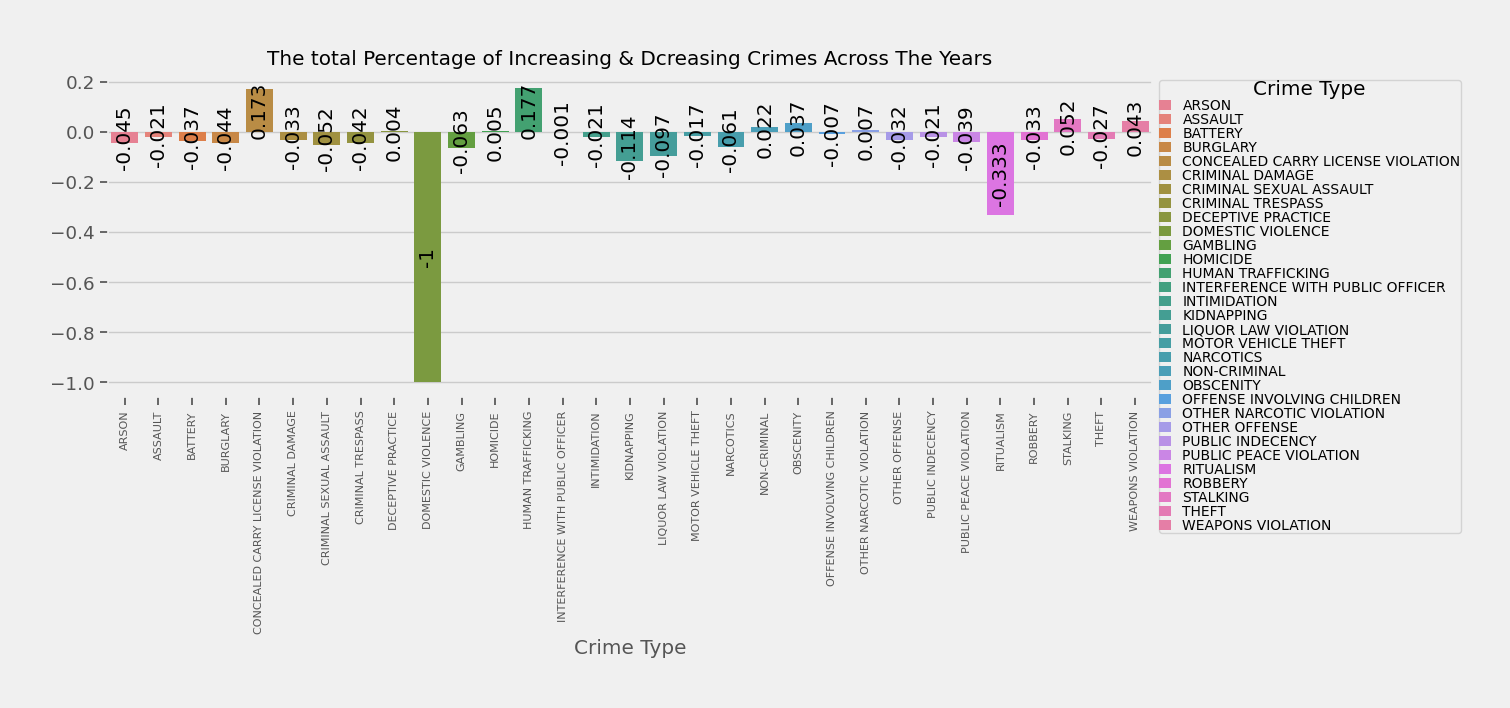

In [44]:
plt_diff=diff.loc["TOTAL",:]
ax=sns.barplot(x=plt_diff.index,y=plt_diff.values,hue=plt_diff.index,legend="full");
ax.set(title="The total Percentage of Increasing & Dcreasing Crimes Across The Years");
ax.tick_params("x",labelrotation=90,labelsize=8)
ax.legend(title="Crime Type", bbox_to_anchor=(1,1),ncol=1,handlelength=0.9, borderpad=0, labelspacing=0,fontsize='x-small')
for container in ax.containers:
    ax.bar_label(container,label_type='center',rotation=90, color='Black');
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

In [48]:
In_Crimes = diff.loc["TOTAL", :][diff.loc["TOTAL", :] > 0]
In_Crimes=In_Crimes.sort_values(ascending=False)
In_Crimes.head(2)

Crime Type
HUMAN TRAFFICKING                    0.177
CONCEALED CARRY LICENSE VIOLATION    0.173
Name: TOTAL, dtype: float64

In [49]:
In_Crimes_list='\n - '.join(In_Crimes.index.tolist())

In [50]:
print(f'There are some crimes that are increasing even while overall crime rates are decreasing :\n - {In_Crimes_list}')

There are some crimes that are increasing even while overall crime rates are decreasing :
 - HUMAN TRAFFICKING
 - CONCEALED CARRY LICENSE VIOLATION
 - STALKING
 - WEAPONS VIOLATION
 - OBSCENITY
 - NON-CRIMINAL
 - OTHER NARCOTIC VIOLATION
 - HOMICIDE
 - DECEPTIVE PRACTICE


 <a name='new6'></a>
# ⭐️**Topic 3) Comparing AM vs. PM Rush Hour:**
>[Click here](#new0) to jump to up

#Are crimes more common during AM rush hour or PM rush hour?

In [51]:
# adding hour of the day (12am=0)
df['HourOfDay'] = df.index.hour
# adding rush hour of the day
df['HourRush'] = df['HourOfDay'].apply(lambda x: 'AM_R' if x in range(7,11) else ('PM_R' if x in range(16,20) else "No_Rush"))
df.head(2)

ID Crime Type                    Description  \
Date                                                            
2001-01-01  3214584      THEFT  FINANCIAL ID THEFT: OVER $300   
2001-01-01  1927872      THEFT        AGG: FINANCIAL ID THEFT   

           Location Description  Arrest  Domestic  Beat District  Ward  \
Date                                                                     
2001-01-01               STREET   False     False  2221     22.0  21.0   
2001-01-01            RESIDENCE   False     False   812      8.0   NaN   

             Latitude  Longitude  Year  HourOfDay HourRush  
Date                                                        
2001-01-01  41.732563 -87.669923  2001          0  No_Rush  
2001-01-01  41.778094 -87.770137  2001          0  No_Rush

In [52]:
#ploting only Rush hours filter
Rush_plot = df.loc[df["HourRush"].isin(["AM_R", "PM_R"])]

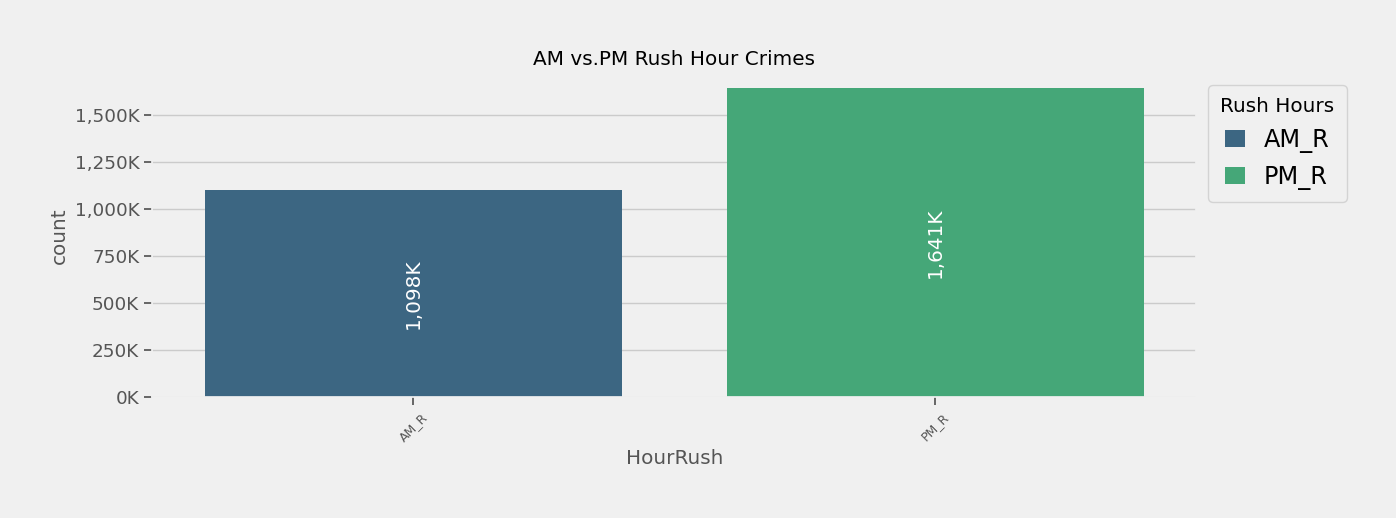

In [53]:
ax=sns.countplot(data=Rush_plot, x='HourRush',palette='viridis',hue="HourRush",legend="full");
ax.set(title="AM vs.PM Rush Hour Crimes");
ax.tick_params("x",labelrotation=45,labelsize= 9)
for container in ax.containers:
    ax.bar_label(container ,label_type='center',rotation=90, color='white',fmt=fmt_thous)
ax.legend(title="Rush Hours",bbox_to_anchor=(1,1),ncol=1,handlelength=0.8, borderpad=0.5, labelspacing=0.5,fontsize='large');
##customize major ticks on yaxis
ax.yaxis.set_major_formatter(fmt_thous)
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

#Crimes are more common during the PM rush hour, with a total of **(1,641 thousand Crimes )**, while the AM rush hour totals **(1,098 thousand Crimes**)"

In [54]:
df["HourRush"].value_counts()

HourRush
No_Rush    4974411
PM_R       1641051
AM_R       1097647
Name: count, dtype: int64

In [55]:
#AM rush hour and PM rush hour filter
AMR=df.loc[df['HourRush']== "AM_R"]
PMR=df.loc[df['HourRush']== "PM_R"]

In [56]:
df.head(2)

ID Crime Type                    Description  \
Date                                                            
2001-01-01  3214584      THEFT  FINANCIAL ID THEFT: OVER $300   
2001-01-01  1927872      THEFT        AGG: FINANCIAL ID THEFT   

           Location Description  Arrest  Domestic  Beat District  Ward  \
Date                                                                     
2001-01-01               STREET   False     False  2221     22.0  21.0   
2001-01-01            RESIDENCE   False     False   812      8.0   NaN   

             Latitude  Longitude  Year  HourOfDay HourRush  
Date                                                        
2001-01-01  41.732563 -87.669923  2001          0  No_Rush  
2001-01-01  41.778094 -87.770137  2001          0  No_Rush

# ​What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?

In [57]:
#using value_counts to filter top 5
top_5am=AMR.value_counts("Crime Type").nlargest(5).sort_values(ascending=True)
top_5pm=PMR.value_counts("Crime Type").nlargest(5).sort_values(ascending=True)

In [58]:
top_5am_dict =top_5am.to_dict()
top_5pm_dict =top_5pm.to_dict()

In [59]:
#to print dict line by line
!pip install pyyaml
import yaml
#print(yaml.dump(my_dict))

In [60]:
print(f'The top 5 most common crimes during\033[1m AM\033[0m rush hour are:\n\033[1m{yaml.dump(top_5am_dict)}\033[0m')
print(f'The top 5 most common crimes during \033[1mPM\033[0m rush hour are:\n\033[1m{yaml.dump(top_5pm_dict)}\033[0m')

The top 5 most common crimes during AM rush hour are:
BATTERY: 158475
BURGLARY: 96219
CRIMINAL DAMAGE: 109089
OTHER OFFENSE: 89870
THEFT: 260759

The top 5 most common crimes during PM rush hour are:
ASSAULT: 118179
BATTERY: 288003
CRIMINAL DAMAGE: 183423
NARCOTICS: 164754
THEFT: 379122



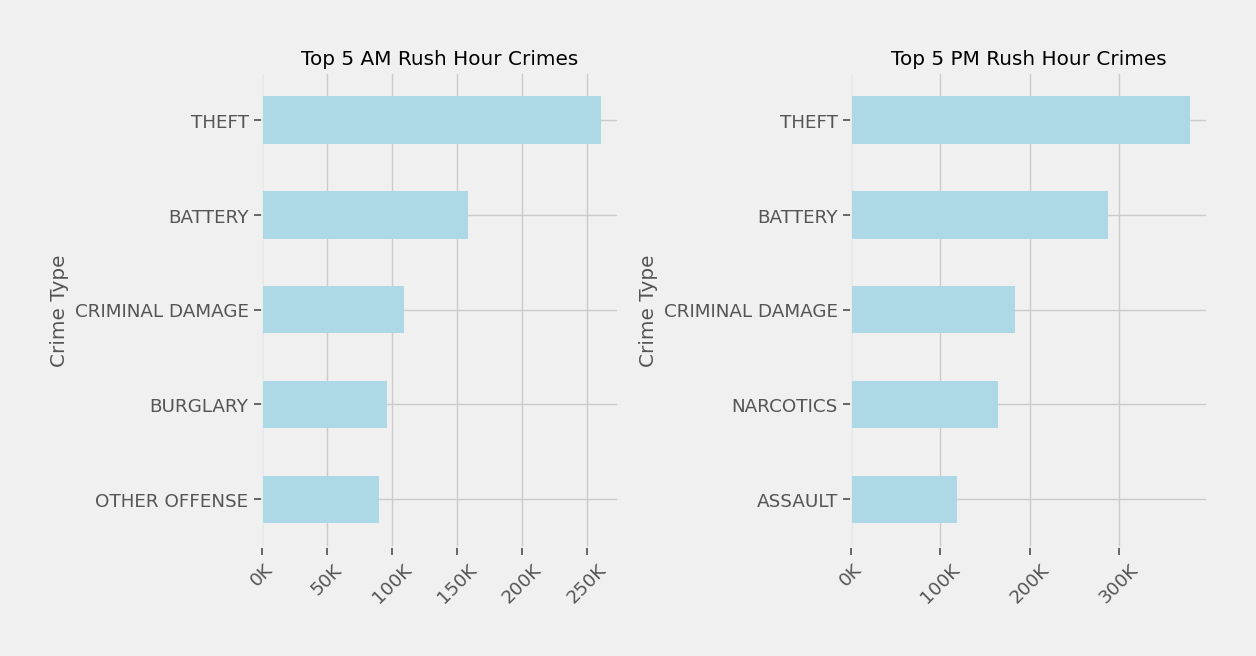

In [61]:

fig, ax = plt.subplots(figsize=(12,6), ncols=2)
top_5am.plot( kind='barh', color='lightblue',ax=ax[0])
top_5pm.plot( kind='barh', color='lightblue',ax=ax[1])

ax[0].set_title("Top 5 AM Rush Hour Crimes")
ax[1].set_title("Top 5 PM Rush Hour Crimes")

ax[0].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='x', labelrotation=45)

ax[0].xaxis.set_major_formatter(fmt_thous)
ax[1].xaxis.set_major_formatter(fmt_thous)


fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

#The top three most common crimes during both the AM and PM rush hours are the same, listed in the following order:
- **THEFT**
- **BATTERY**
- **CRIMINAL DAMAGE**


#Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [62]:
MOTOR_THEFT=Rush_plot.loc[Rush_plot["Crime Type"]=="MOTOR VEHICLE THEFT"]
MOTOR_THEFT.groupby("Crime Type")["HourRush"].value_counts()



Crime Type           HourRush
MOTOR VEHICLE THEFT  PM_R        74678
                     AM_R        54035
Name: count, dtype: int64

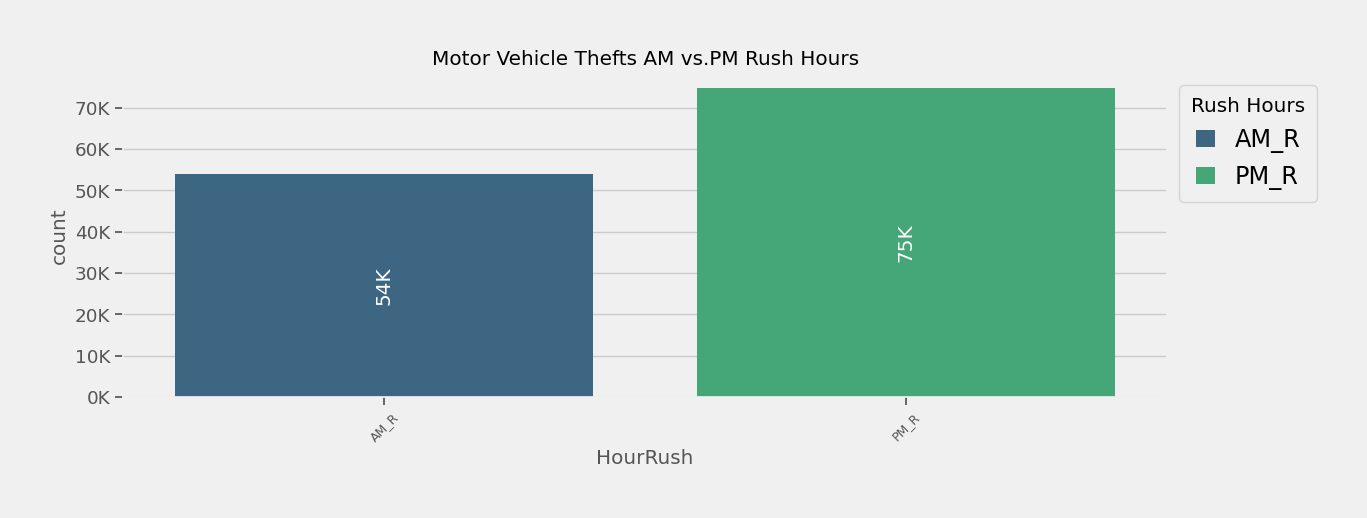

In [63]:

ax=sns.countplot(data=MOTOR_THEFT, x='HourRush',palette='viridis',hue="HourRush",legend="full");
ax.set(title="Motor Vehicle Thefts AM vs.PM Rush Hours");
ax.tick_params("x",labelrotation=45,labelsize= 9)
for container in ax.containers:
    ax.bar_label(container ,label_type='center',rotation=90, color='white',fmt=fmt_thous)
ax.legend(title="Rush Hours",bbox_to_anchor=(1,1),ncol=1,handlelength=0.8, borderpad=0.5, labelspacing=0.5,fontsize='large');
##customize major ticks on yaxis
ax.yaxis.set_major_formatter(fmt_thous)
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

In [64]:
#using value_counts to filter top 5
Motor_dict=MOTOR_THEFT.groupby("HourRush")["Crime Type"].size()
Motor_dict=Motor_dict.to_dict()

In [65]:
print(f'Motor vehicle thefts are more common during the PM rush hour than the AM rush hour, with scores of: \n\033[1m{yaml.dump(Motor_dict)}\033[0m')

Motor vehicle thefts are more common during the PM rush hour than the AM rush hour, with scores of: 
AM_R: 54035
PM_R: 74678



#Motor vehicle thefts are more common during the PM rush hour than the AM rush hour, with scores of:
- **AM_R: 54035**
- **PM_R: 74678**

 <a name='new5'></a>
# ⭐️**Topic 6) What cycles (seasonality) can you find in this data?**
>[Click here](#new0) to jump to up

---------------------------------------------------------------------------
#What cycles (seasonality) can you find in this data?

In [66]:
# import the statsmodels time series analysis api module
import statsmodels.tsa.api as tsa
tsa

<module 'statsmodels.tsa.api' from '/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/api.py'>

In [67]:
Crimes=df2['Date'].value_counts().sort_index().to_frame('Crimes').reset_index()
Crimes.head(2)

Date  Crimes
0  01/01/2001 01:00:00 AM      32
1  01/01/2001 01:00:00 PM      22

In [68]:
# count all crimes to fined
Crimes['Date'] = pd.to_datetime(Crimes['Date'],errors='coerce')
Crimes=Crimes.set_index("Date")


In [69]:
Crimes.head(2)

Crimes
Date                       
2001-01-01 01:00:00      32
2001-01-01 13:00:00      22

#Total Crime (Daily)

looking for 2022 year behaver for daily craimes

In [70]:
#resampled to the day  frequency looking for Total Crime (Daily)
CrimesH=Crimes.resample('H').sum()
CrimesH22=CrimesH.loc['2022-09-01':'2022-10-30']

In [71]:
#dividing time series data into 3 components by seasonal_decompose
SCrimesH22 = tsa.seasonal_decompose(CrimesH22)

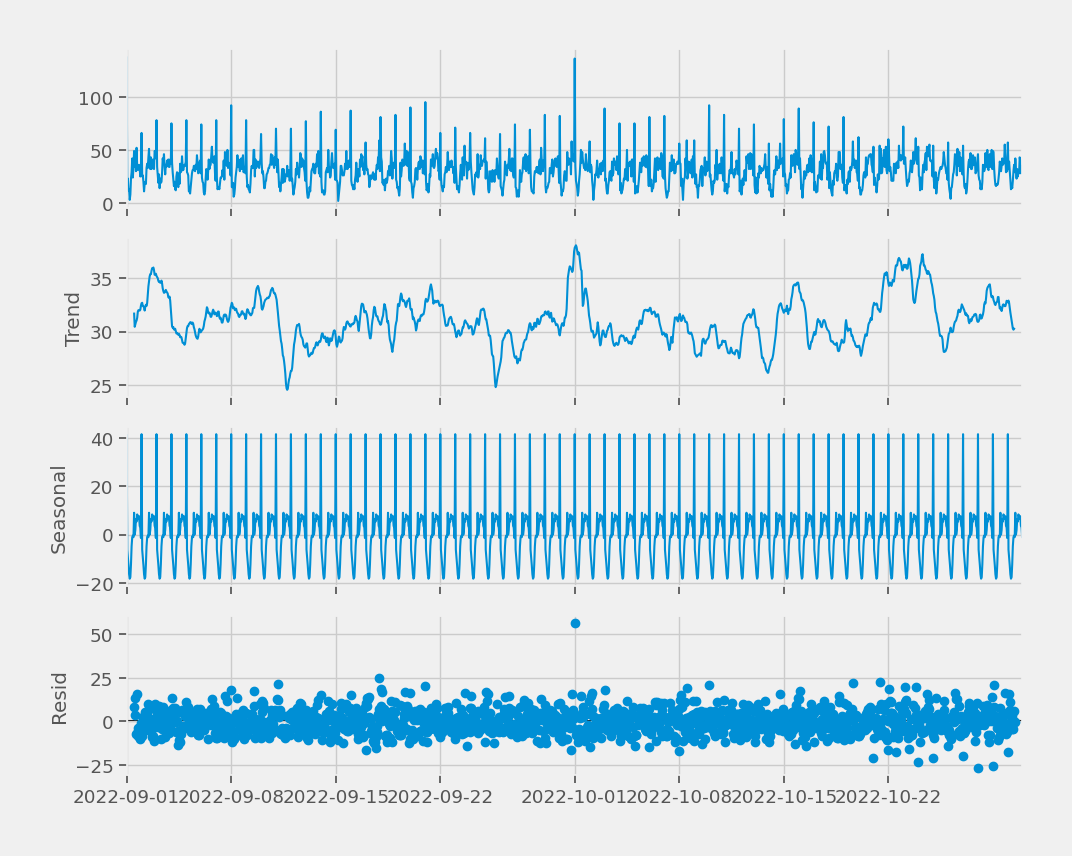

In [72]:
fig = SCrimesH22.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

In [73]:
Seasonal=SCrimesH22.seasonal
Seasonal.head()

Date
2022-09-01 00:00:00    41.573196
2022-09-01 01:00:00    -6.169389
2022-09-01 02:00:00    -9.245307
2022-09-01 03:00:00   -12.559925
2022-09-01 04:00:00   -16.364657
Freq: H, Name: seasonal, dtype: float64

#Determining Seasonal Fluctuation - Magnitude

In [74]:
max =Seasonal.max()
min = Seasonal.min()
magnitude = Seasonal.max() -Seasonal.min()
print(f' max values of the seasonal component{max.round(2)}crimes\n min values of the seasonal component{min.round(2)}crimes\n magnitude of the seasonal component{magnitude.round(2)}crimes')


 max values of the seasonal component41.57crimes
 min values of the seasonal component-18.2crimes
 magnitude of the seasonal component59.77crimes


In [75]:
import matplotlib.dates as mdates
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for {"crime"}');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')

    return fig, ax



In [76]:
delta = Seasonal.idxmax() - Seasonal.idxmin()
print(f'the difference between the min and max is a timedelta of {abs(abs(delta.days * 24 + delta.seconds // 3600))}hours.')

the difference between the min and max is a timedelta of 5hours.


In [77]:
from scipy.signal import find_peaks
peaks, props = find_peaks(Seasonal, height=Seasonal.max())

In [78]:
peak_dates = Seasonal.index[peaks]
peak_dates

DatetimeIndex(['2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09',
               '2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
      

In [79]:
period = peak_dates[1] - peak_dates[0]
period

Timedelta('1 days 00:00:00')

In [80]:
periods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    periods.append(delta)
periods



[Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedel

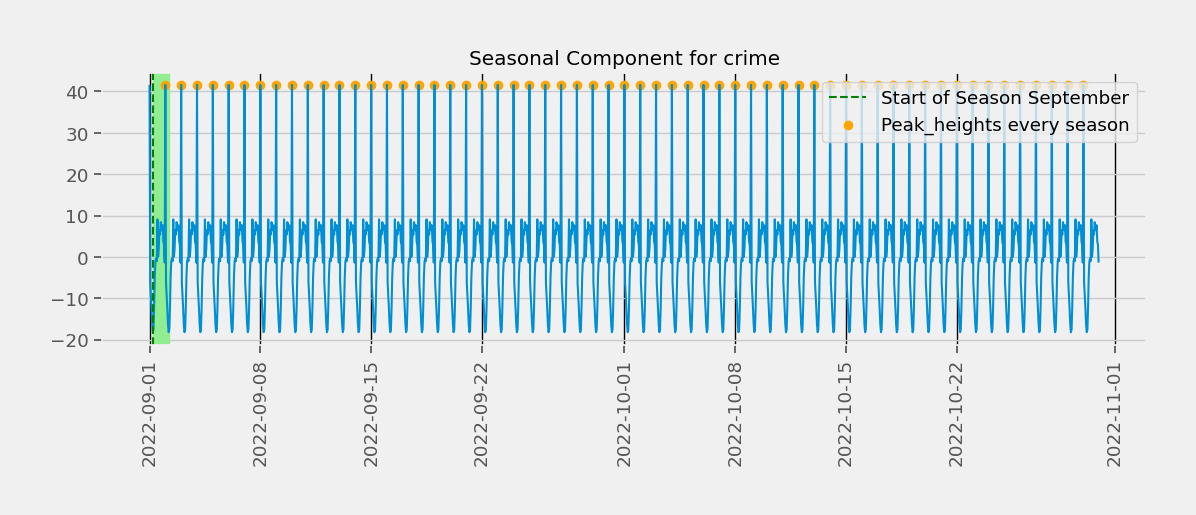

In [81]:
fig, ax = plot_seasonal(Seasonal)
season_start = Seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.scatter(peak_dates, props['peak_heights'], color='orange',
            label=f"Peak_heights every season")
ax.legend();


In [82]:
overallH= Seasonal.max() - Seasonal.min()
print(f'There is seasonality in the # of crimes with a period of {period.days} day, with an overall seasonal fluctuation of ~{overallH.round(2)} crimes per day.')

There is seasonality in the # of crimes with a period of 1 day, with an overall seasonal fluctuation of ~59.77 crimes per day.


#Total Crime (Daily) = 58  as seasonal crimes
##There is seasonality in the # of crimes with a period of 1 day, with an overall seasonal fluctuation of ~59.77 crimes per day.
-------------------------------------------------------------------------------------------

#Total Crime (Weekly)

looking for the last 2 years behaver for daly craimes looking for

In [83]:
#resampled to the week  frequency looking for Total Crime (weekly)
Crimesw=Crimes.resample('D').sum()
Crimesw22=Crimesw.loc['2022-04-1':'2022-12-31']

In [84]:
#dividing time series data into 3 components by seasonal_decompose
SCrimesw22 = tsa.seasonal_decompose(Crimesw22)


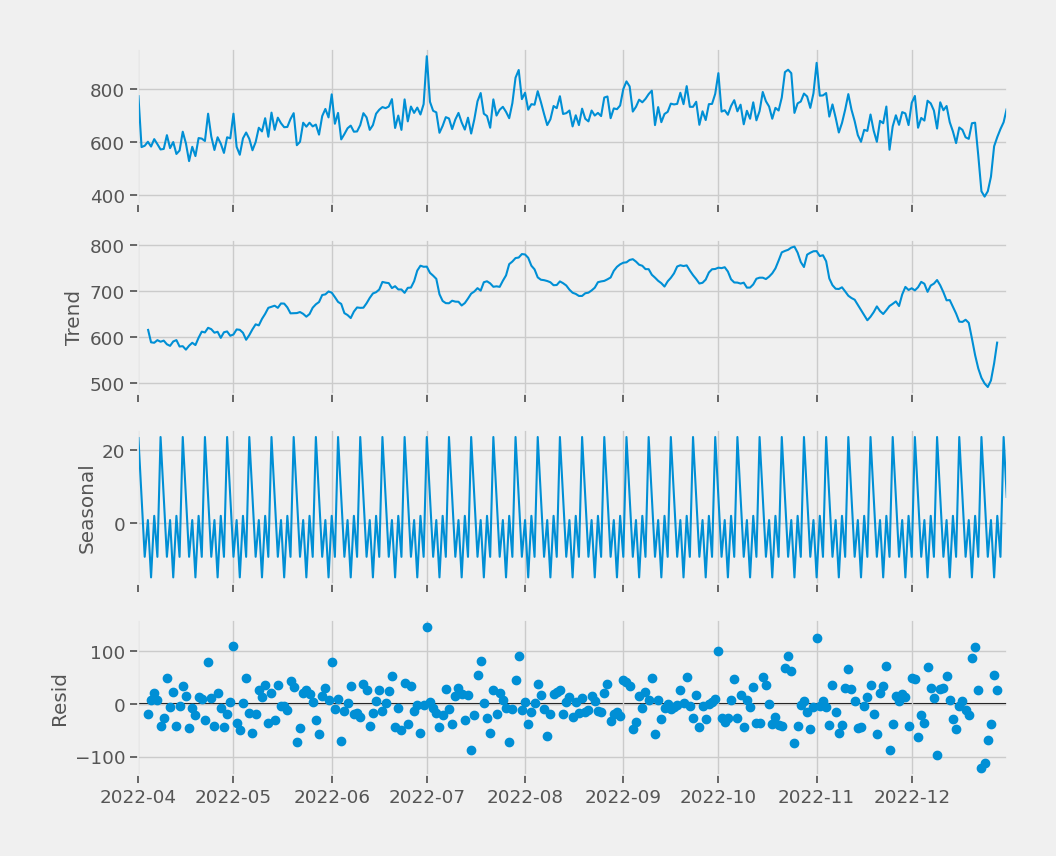

In [85]:
fig = SCrimesw22.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

#Decomposed - Seasonal

In [86]:
seasonal=SCrimesw22.seasonal

#Determining Seasonal Fluctuation - Magnitude

In [87]:
max =seasonal.max()
min = seasonal.min()
magnitude = seasonal.max() -seasonal.min()
print(f' max values of the seasonal component{max.round(2)}crimes\n min values of the seasonal component{min.round(2)}crimes\n magnitude of the seasonal component{magnitude.round(2)}crimes')


 max values of the seasonal component23.46crimes
 min values of the seasonal component-14.79crimes
 magnitude of the seasonal component38.25crimes


#Determining Seasonal Fluctuation - Magnitude

In [88]:
max =seasonal.max()
min = seasonal.min()
magnitude = seasonal.max() -seasonal.min()
print(f' max values of the seasonal component{max.round(2)}crimes\n min values of the seasonal component{min.round(2)}crimes\n magnitude of the seasonal component{magnitude.round(2)}crimes')


 max values of the seasonal component23.46crimes
 min values of the seasonal component-14.79crimes
 magnitude of the seasonal component38.25crimes


In [89]:
import matplotlib.dates as mdates
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for {"crimes "}');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')

    return fig, ax



In [90]:
delta = seasonal.idxmax() - seasonal.idxmin()
print(f'the difference between the min and max is a timedelta of {abs(delta.days)} days.')

the difference between the min and max is a timedelta of 4 days.


In [91]:
delta

Timedelta('-4 days +00:00:00')

In [92]:
from scipy.signal import find_peaks
peaks, props = find_peaks(seasonal, height=seasonal.max())

In [93]:
peak_dates = seasonal.index[peaks]
peak_dates

DatetimeIndex(['2022-04-08', '2022-04-15', '2022-04-22', '2022-04-29',
               '2022-05-06', '2022-05-13', '2022-05-20', '2022-05-27',
               '2022-06-03', '2022-06-10', '2022-06-17', '2022-06-24',
               '2022-07-01', '2022-07-08', '2022-07-15', '2022-07-22',
               '2022-07-29', '2022-08-05', '2022-08-12', '2022-08-19',
               '2022-08-26', '2022-09-02', '2022-09-09', '2022-09-16',
               '2022-09-23', '2022-09-30', '2022-10-07', '2022-10-14',
               '2022-10-21', '2022-10-28', '2022-11-04', '2022-11-11',
               '2022-11-18', '2022-11-25', '2022-12-02', '2022-12-09',
               '2022-12-16', '2022-12-23', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [94]:
period = peak_dates[1] - peak_dates[0]
period

Timedelta('7 days 00:00:00')

In [95]:
periods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    periods.append(delta)
periods



[Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedelta('7 days 00:00:00'),
 Timedel

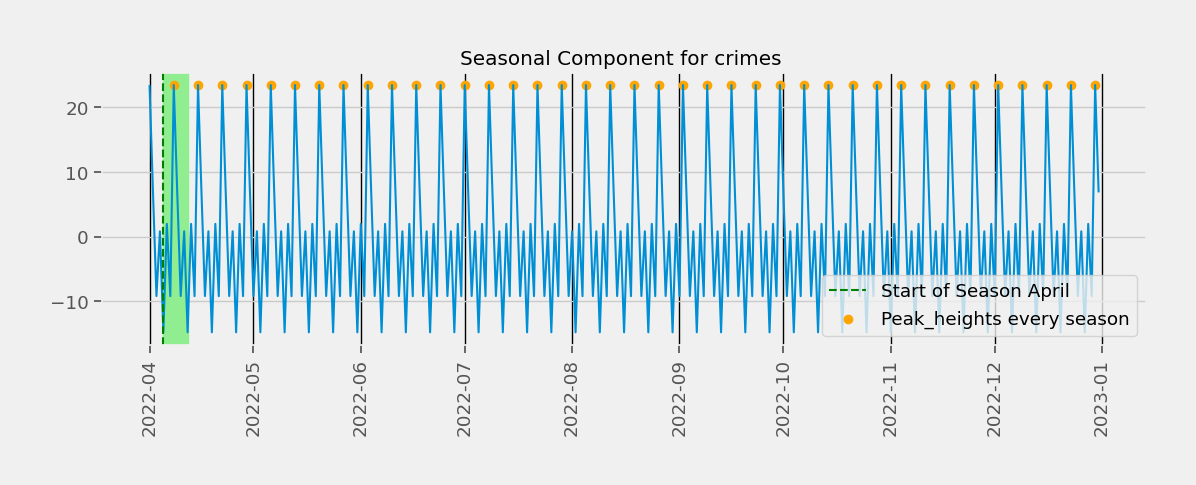

In [96]:
fig, ax = plot_seasonal(seasonal)
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.scatter(peak_dates, props['peak_heights'], color='orange',
            label=f"Peak_heights every season")
ax.legend( loc='lower right');


#Determining Seasonal Fluctuation - Magnitude

In [97]:
max =seasonal.max()
min = seasonal.min()
magnitude = seasonal.max() -seasonal.min()
print(f' max values of the seasonal component{max.round(2)}crimes\n min values of the seasonal component{min.round(2)}crimes\n magnitude of the seasonal component{magnitude.round(2)}crimes')


 max values of the seasonal component23.46crimes
 min values of the seasonal component-14.79crimes
 magnitude of the seasonal component38.25crimes


#Determining Seasonal Fluctuation - Magnitude

In [98]:
max =seasonal.max()
min = seasonal.min()
magnitude = seasonal.max() -seasonal.min()
print(f' max values of the seasonal component{max.round(2)}crimes\n min values of the seasonal component{min.round(2)}crimes\n magnitude of the seasonal component{magnitude.round(2)}crimes')


 max values of the seasonal component23.46crimes
 min values of the seasonal component-14.79crimes
 magnitude of the seasonal component38.25crimes


In [99]:
overallW= seasonal.max() - seasonal.min()
weeks = period.days // 7
print(f'There is seasonality in the # of crimes with a period of {period.days} days which is {weeks}week.')
print (f'overall seasonal fluctuation of ~{overallW.round(2)} crimes per day.\nTotal weekly crimes ={overallW.round(2)*6}')


There is seasonality in the # of crimes with a period of 7 days which is 1week.
overall seasonal fluctuation of ~38.25 crimes per day.
Total weekly crimes =229.5


#Total Crime (Weekly) = 230
##There is seasonality in the # of crimes with a period of 7 days, with an overall seasonal fluctuation of ~38 crimes per day.
-------------------------------------------------------------------------------------------

#Total Crime (Monthly)

In [100]:
#resampled to the day  frequency looking for Total Crime (Daily)
CrimesM=Crimes.resample('W').sum()
CrimesM22=CrimesM.loc['2012':'2022']

In [101]:
#dividing time series data into 3 components by seasonal_decompose
SCrimesM22 = tsa.seasonal_decompose(CrimesM22)


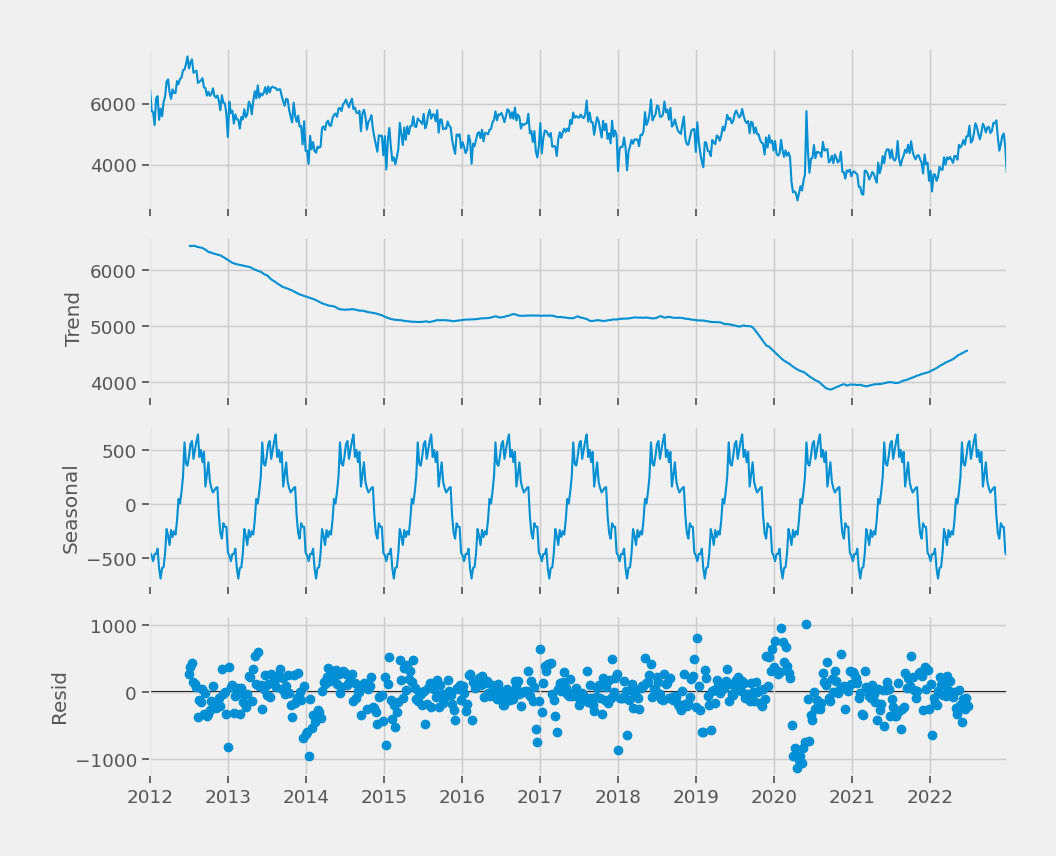

In [102]:
fig = SCrimesM22.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

#Decomposed - Seasonal

In [103]:
seasonal=SCrimesM22.seasonal

#Determining Seasonal Fluctuation - Magnitude

In [104]:
max =seasonal.max()
min = seasonal.min()
magnitude = seasonal.max() -seasonal.min()
print(f' max values of the seasonal component{max.round(2)}crimes\n min values of the seasonal component{min.round(2)}crimes\n magnitude of the seasonal component{magnitude.round(2)}crimes')


 max values of the seasonal component648.32crimes
 min values of the seasonal component-687.29crimes
 magnitude of the seasonal component1335.62crimes


In [105]:
import matplotlib.dates as mdates
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for {"Crimes "}');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')

    return fig, ax



In [106]:
delta = seasonal.idxmax() - seasonal.idxmin()
print(f'the difference between the min and max is a timedelta of {abs(delta.days)} days.')

the difference between the min and max is a timedelta of 175 days.


In [107]:
from scipy.signal import find_peaks
peaks, props = find_peaks(seasonal, height=seasonal.max())

In [108]:
peak_dates = seasonal.index[peaks]
peak_dates

DatetimeIndex(['2012-08-12', '2013-08-11', '2014-08-10', '2015-08-09',
               '2016-08-07', '2017-08-06', '2018-08-05', '2019-08-04',
               '2020-08-02', '2021-08-01', '2022-07-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [109]:
period = peak_dates[1] - peak_dates[0]
period

Timedelta('364 days 00:00:00')

In [110]:
periods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    periods.append(delta)
periods



[Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00')]

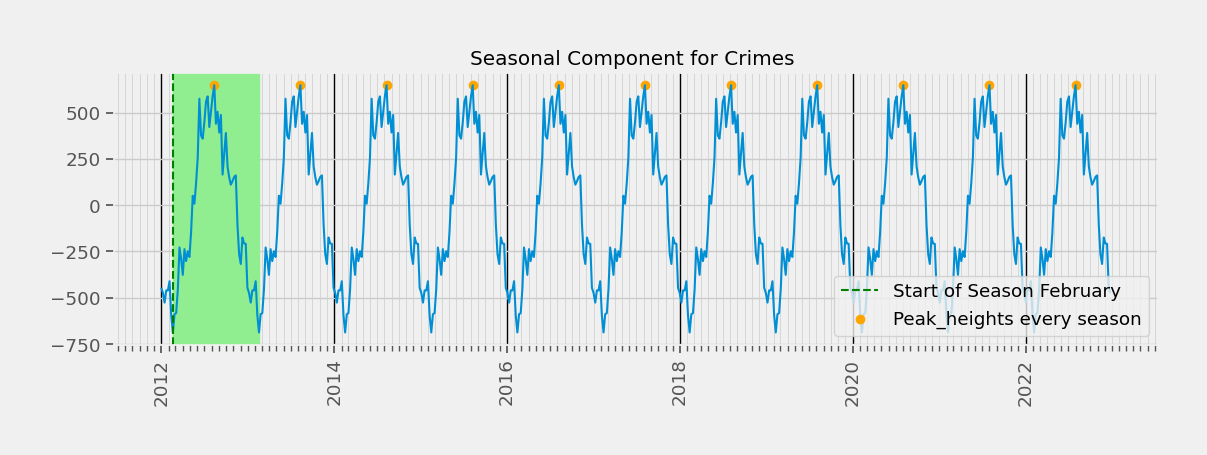

In [111]:
fig, ax = plot_seasonal(seasonal)
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.scatter(peak_dates, props['peak_heights'], color='orange',
            label=f"Peak_heights every season")
ax.legend(loc='lower right');


In [112]:
overallW= seasonal.max() - seasonal.min()
weeks = period.days // 7
print(f'There is seasonality in the # of crimes with a period of {period.days} days which is {weeks}week, with an overall seasonal fluctuation of ~{overallW.round(2)} crimes per week.')

There is seasonality in the # of crimes with a period of 364 days which is 52week, with an overall seasonal fluctuation of ~1335.62 crimes per week.


#There are no cycles (seasonality) evident in the monthly patterns.
#there is seasonality in the #  crimes with a period of 364 days, with an overall seasonal fluctuation of ~1336 crimes per week.


---------------------------------------------------------------
#Select a Primary Type of interest to you  (Monthly)

In [113]:
df2.head(2)

ID                    Date Crime Type Description  \
0  1326041  01/01/2001 01:00:00 AM    BATTERY      SIMPLE   
1  1319931  01/01/2001 01:00:00 PM    BATTERY      SIMPLE   

  Location Description  Arrest  Domestic  Beat District  Ward   Latitude  \
0            RESIDENCE   False     False  1624     16.0   NaN  41.957850   
1            RESIDENCE   False      True   825      8.0   NaN  41.783892   

   Longitude  
0 -87.749185  
1 -87.684841

In [114]:
Primary_Type =df2.groupby("Date")["Crime Type"].value_counts().reset_index()
Primary_Type.head(2)

Date       Crime Type  count
0  01/01/2001 01:00:00 AM  CRIMINAL DAMAGE     11
1  01/01/2001 01:00:00 AM          BATTERY      6

In [115]:
Primary_Type= pd.pivot_table(Primary_Type, values='count', columns='Crime Type', index='Date').reset_index()
Primary_Type.head(2)

Crime Type                    Date  ARSON  ASSAULT  BATTERY  BURGLARY  \
0           01/01/2001 01:00:00 AM    NaN      1.0      6.0       NaN   
1           01/01/2001 01:00:00 PM    NaN      2.0      3.0       1.0   

Crime Type  CONCEALED CARRY LICENSE VIOLATION  CRIMINAL DAMAGE  \
0                                         NaN             11.0   
1                                         NaN              2.0   

Crime Type  CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  DECEPTIVE PRACTICE  \
0                               3.0                NaN                 1.0   
1                               NaN                NaN                 NaN   

Crime Type  DOMESTIC VIOLENCE  GAMBLING  HOMICIDE  HUMAN TRAFFICKING  \
0                         NaN       NaN       NaN                NaN   
1                         NaN       1.0       NaN                NaN   

Crime Type  INTERFERENCE WITH PUBLIC OFFICER  INTIMIDATION  KIDNAPPING  \
0                                        NaN           NaN         NaN   
1                                        NaN           NaN         NaN   

Crime Type  LIQUOR LAW VIOLATION  MOTOR VEHICLE THEFT  NARCOTICS  \
0                            NaN                  NaN        NaN   
1                            NaN                  2.0        1.0   

Crime Type  NON-CRIMINAL  OBSCENITY  OFFENSE INVOLVING CHILDREN  \
0                    NaN        NaN                         2.0   
1                    NaN        NaN                         NaN   

Crime Type  OTHER NARCOTIC VIOLATION  OTHER OFFENSE  PUBLIC INDECENCY  \
0                                NaN            2.0               NaN   
1                                NaN            4.0               NaN   

Crime Type  PUBLIC PEACE VIOLATION  RITUALISM  ROBBERY  STALKING  THEFT  \
0                              NaN        NaN      NaN       NaN    5.0   
1                              1.0        NaN      NaN       NaN    5.0   

Crime Type  WEAPONS VIOLATION  
0                         1.0  
1                         NaN

In [116]:
Primary=Primary_Type.fillna(0)
Primary['Date'] = pd.to_datetime(Primary['Date'], errors='coerce')
Primary= Primary.dropna(subset=['Date'])
## setting and sorting the index
Primary= Primary.set_index("Date")
Primary = Primary.sort_index()
Primary.head(2)

Crime Type           ARSON  ASSAULT  BATTERY  BURGLARY  \
Date                                                     
2001-01-01 00:00:00    0.0      2.0      1.0       1.0   
2001-01-01 00:01:00    0.0      0.0      1.0       1.0   

Crime Type           CONCEALED CARRY LICENSE VIOLATION  CRIMINAL DAMAGE  \
Date                                                                      
2001-01-01 00:00:00                                0.0             12.0   
2001-01-01 00:01:00                                0.0              7.0   

Crime Type           CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  \
Date                                                              
2001-01-01 00:00:00                     52.0                0.0   
2001-01-01 00:01:00                     22.0                0.0   

Crime Type           DECEPTIVE PRACTICE  DOMESTIC VIOLENCE  GAMBLING  \
Date                                                                   
2001-01-01 00:00:00                16.0                0.0       0.0   
2001-01-01 00:01:00                18.0                0.0       0.0   

Crime Type           HOMICIDE  HUMAN TRAFFICKING  \
Date                                               
2001-01-01 00:00:00       0.0                0.0   
2001-01-01 00:01:00       0.0                0.0   

Crime Type           INTERFERENCE WITH PUBLIC OFFICER  INTIMIDATION  \
Date                                                                  
2001-01-01 00:00:00                               0.0           0.0   
2001-01-01 00:01:00                               0.0           0.0   

Crime Type           KIDNAPPING  LIQUOR LAW VIOLATION  MOTOR VEHICLE THEFT  \
Date                                                                         
2001-01-01 00:00:00         0.0                   0.0                  0.0   
2001-01-01 00:01:00         0.0                   0.0                  4.0   

Crime Type           NARCOTICS  NON-CRIMINAL  OBSCENITY  \
Date                                                      
2001-01-01 00:00:00        0.0           0.0        0.0   
2001-01-01 00:01:00        0.0           0.0        0.0   

Crime Type           OFFENSE INVOLVING CHILDREN  OTHER NARCOTIC VIOLATION  \
Date                                                                        
2001-01-01 00:00:00                        30.0                       0.0   
2001-01-01 00:01:00                        36.0                       0.0   

Crime Type           OTHER OFFENSE  PUBLIC INDECENCY  PUBLIC PEACE VIOLATION  \
Date                                                                           
2001-01-01 00:00:00            8.0               0.0                     0.0   
2001-01-01 00:01:00            4.0               0.0                     0.0   

Crime Type           RITUALISM  ROBBERY  STALKING  THEFT  WEAPONS VIOLATION  
Date                                                                         
2001-01-01 00:00:00        0.0      0.0       0.0   71.0                0.0  
2001-01-01 00:01:00        0.0      0.0       0.0   49.0                0.0

#"Exploring the seasonality of the increasing crime rates over the years, with a focus on 'Criminal Sexual Assault,' which has the highest scores.

In [117]:
Primary_S=Primary['CRIMINAL SEXUAL ASSAULT']

In [118]:
#resampled to the day  frequency looking for Total Crime (Daily)
CrimesM=Primary_S.resample('W').sum()
CrimesM22=CrimesM.loc['2010':'2022']

In [119]:
#dividing time series data into 3 components by seasonal_decompose
SCrimesM22 = tsa.seasonal_decompose(CrimesM22)


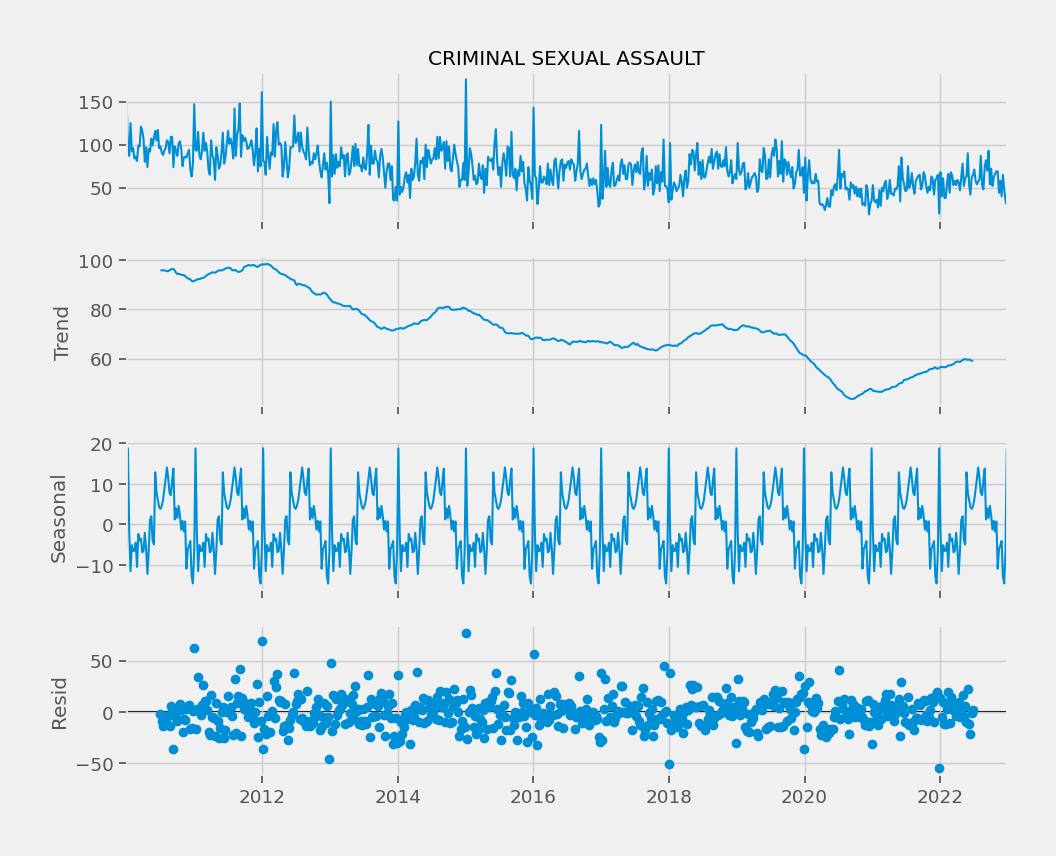

In [120]:
fig = SCrimesM22.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

#Decomposed - Seasonal

In [121]:
seasonal=SCrimesM22.seasonal

In [ ]:
max =seasonal.max()
min = seasonal.min()
magnitude = seasonal.max() -seasonal.min()
print(f' max values of the seasonal component{max.round(2)}crimes\n min values of the seasonal component{min.round(2)}crimes\n magnitude of the seasonal component{magnitude.round(2)}crimes')


 max values of the seasonal component4.1crimes
 min values of the seasonal component-1.93crimes
 magnitude of the seasonal component6.03crimes


In [ ]:
import matplotlib.dates as mdates
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for {"Crimes "}');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')

    return fig, ax



In [122]:
delta = seasonal.idxmax() - seasonal.idxmin()
print(f'the difference between the min and max is a timedelta of {abs(delta.days)} days.')

the difference between the min and max is a timedelta of 350 days.


In [123]:
from scipy.signal import find_peaks
peaks, props = find_peaks(seasonal, height=seasonal.max())

In [124]:
peak_dates = seasonal.index[peaks]
peak_dates

DatetimeIndex(['2010-01-10', '2011-01-09', '2012-01-08', '2013-01-06',
               '2014-01-05', '2015-01-04', '2016-01-03', '2017-01-01',
               '2017-12-31', '2018-12-30', '2019-12-29', '2020-12-27',
               '2021-12-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [125]:
period = peak_dates[1] - peak_dates[0]
period

Timedelta('364 days 00:00:00')

In [126]:
periods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    periods.append(delta)
periods



[Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00')]

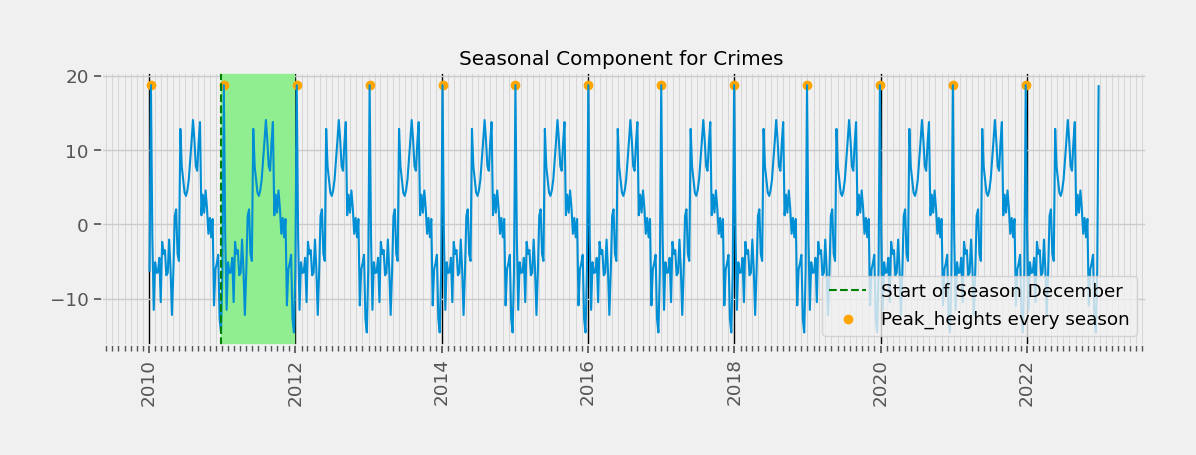

In [127]:
fig, ax = plot_seasonal(seasonal)
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.scatter(peak_dates, props['peak_heights'], color='orange',
            label=f"Peak_heights every season")
ax.legend(loc='lower right');


In [130]:
overallW= seasonal.max() - seasonal.min()
weeks = period.days // 7
print(f'There is seasonality in the # of crimes with a period of {period.days} days which is {weeks}week, with an overall seasonal fluctuation of ~{overallW.round(2)} crimes per Week.')

There is seasonality in the # of crimes with a period of 364 days which is 52week, with an overall seasonal fluctuation of ~33.21 crimes per Week.


In [131]:
peak_dates

DatetimeIndex(['2010-01-10', '2011-01-09', '2012-01-08', '2013-01-06',
               '2014-01-05', '2015-01-04', '2016-01-03', '2017-01-01',
               '2017-12-31', '2018-12-30', '2019-12-29', '2020-12-27',
               '2021-12-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

#There are no cycles (seasonality) evident in the monthly patterns.
#There is seasonality in the # of 'CRIMINAL SEXUAL ASSAULT' with a period of 364 days which is 52week, with an overall seasonal fluctuation of ~6.03 crimes per Week.
- Since the highest number of 'Criminal Sexual Assault' incidents is reported in January, addressing this trend could help in developing strategies to prevent such increases
